In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [20]:
iris = load_iris()

In [21]:
iris_df = pd.DataFrame(data=iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)

In [23]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [24]:
#labels값을 cluster 칼럼으로 iris_df에 추가한다
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

In [25]:
iris_result = iris_df.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

In [28]:
iris_df['pca_x'] = pca_transformed[:, 0] #열 부분의 숫자의 의미는?
iris_df['pca_y'] = pca_transformed[:, 1]

In [29]:
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [30]:
#군집 값이 0,1,2 인 경우마다 별도의 인덱스 추출
marker0_ind = iris_df[iris_df['cluster']==0].index
marker1_ind = iris_df[iris_df['cluster']==1].index
marker2_ind = iris_df[iris_df['cluster']==2].index

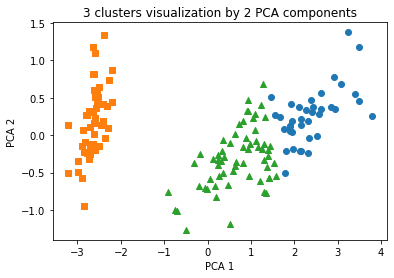

In [32]:
#군집 값 0,1,2 에 해당하는 인덱스로 각 군집 레벨의 pca_x pca_y 값 추출 o,s,^로 마커 표시
plt.scatter(x=iris_df.loc[marker0_ind, 'pca_x'], y=iris_df.loc[marker0_ind, 'pca_y'],marker='o')
plt.scatter(x=iris_df.loc[marker1_ind, 'pca_x'], y=iris_df.loc[marker1_ind, 'pca_y'],marker='s')
plt.scatter(x=iris_df.loc[marker2_ind, 'pca_x'], y=iris_df.loc[marker2_ind, 'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 PCA components')
plt.show()